In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23, header=0, low_memory=False)

df.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [3]:
df['date']


0         10-apr-1996 14:00
1         31-jul-1996 08:00
2         31-jul-1996 09:00
3         31-jul-1996 10:00
4         31-jul-1996 11:00
                ...        
248389    30-nov-2024 20:00
248390    30-nov-2024 21:00
248391    30-nov-2024 22:00
248392    30-nov-2024 23:00
248393    01-dec-2024 00:00
Name: date, Length: 248394, dtype: object

In [4]:
# drop first row due to inconsistency in data
df.drop(df.index[0], inplace=True)
df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
5,31-jul-1996 12:00,0,0.0,0,14.4,0,10.9,7.3,0.0,0,...,0,0,0,0,1,82,0.0,40000,43,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248389,30-nov-2024 20:00,0,0.0,0,11.6,0,10.9,10.3,12.5,91,...,2,17,2,200,,,0.0,,0,8
248390,30-nov-2024 21:00,0,0.0,0,11.4,0,10.7,10.0,12.3,91,...,2,16,2,200,,,0.0,,0,8
248391,30-nov-2024 22:00,0,0.0,0,10.9,0,10.3,9.7,12.0,92,...,2,15,2,210,,,0.0,,0,8
248392,30-nov-2024 23:00,0,0.0,0,10.8,0,10.3,9.9,12.1,94,...,2,14,2,190,,,0.0,,0,8


In [5]:
df_columns =df[['temp', 'wdsp']]
df_columns

,temp,wdsp
1,11.5,0
2,11.6,0
3,12.9,0
4,14.5,0
5,14.4,0
...,...,...
248389,11.6,17
248390,11.4,16
248391,10.9,15
248392,10.8,14


In [6]:
df.dtypes

date      object
ind        int64
rain      object
ind.1      int64
temp     float64
ind.2      int64
wetb     float64
dewpt    float64
vappr    float64
rhum       int64
msl       object
ind.3      int64
wdsp      object
ind.4      int64
wddir     object
ww        object
w         object
sun      float64
vis       object
clht      object
clamt     object
dtype: object

In [7]:
# change temp and wdsp to numeric data type
#df['temp']=pd.to_numeric(df['temp'], errors='coerce') 
df['wdsp']=pd.to_numeric(df['wdsp'], errors='coerce') # coerce gives NA values for non numeric data in the  wdsp column.


df.dtypes

date      object
ind        int64
rain      object
ind.1      int64
temp     float64
ind.2      int64
wetb     float64
dewpt    float64
vappr    float64
rhum       int64
msl       object
ind.3      int64
wdsp     float64
ind.4      int64
wddir     object
ww        object
w         object
sun      float64
vis       object
clht      object
clamt     object
dtype: object

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['date']

C:\Users\louis\AppData\Local\Temp\ipykernel_12108\3672094586.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
5        1996-07-31 12:00:00
                 ...        
248389   2024-11-30 20:00:00
248390   2024-11-30 21:00:00
248391   2024-11-30 22:00:00
248392   2024-11-30 23:00:00
248393   2024-12-01 00:00:00
Name: date, Length: 248393, dtype: datetime64[ns]

In [9]:
df.isna().sum()

date      0
ind       0
rain      0
ind.1     0
temp      0
ind.2     0
wetb      0
dewpt     0
vappr     0
rhum      0
msl       0
ind.3     0
wdsp     50
ind.4     0
wddir     0
ww        0
w         0
sun       0
vis       0
clht      0
clamt     0
dtype: int64

In [10]:
# drop rows with missing values 
df.dropna(inplace=True)


In [11]:
df.isna().sum()

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64

In [12]:
df.dtypes

date     datetime64[ns]
ind               int64
rain             object
ind.1             int64
temp            float64
ind.2             int64
wetb            float64
dewpt           float64
vappr           float64
rhum              int64
msl              object
ind.3             int64
wdsp            float64
ind.4             int64
wddir            object
ww               object
w                object
sun             float64
vis              object
clht             object
clamt            object
dtype: object

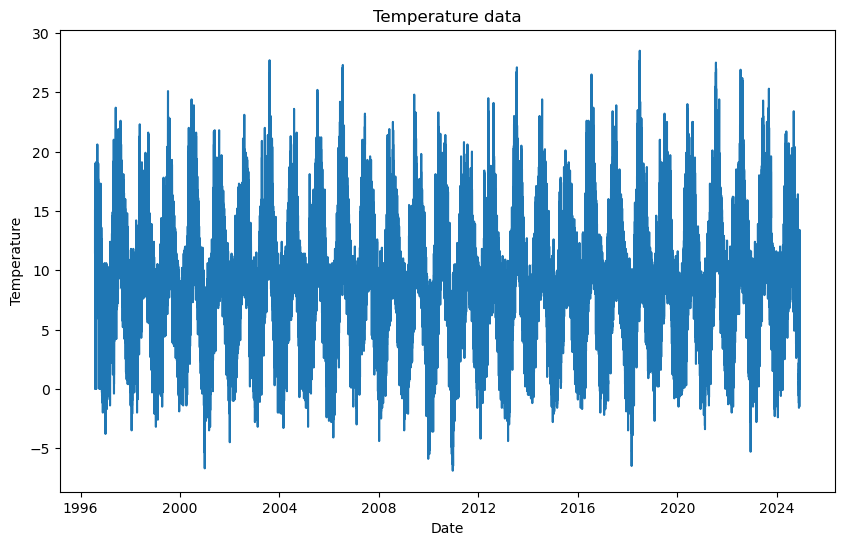

In [13]:
# plot temperature data 
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['date'], df['temp'])
ax.set(xlabel='Date', ylabel='Temperature', title='Temperature data')
plt.show()

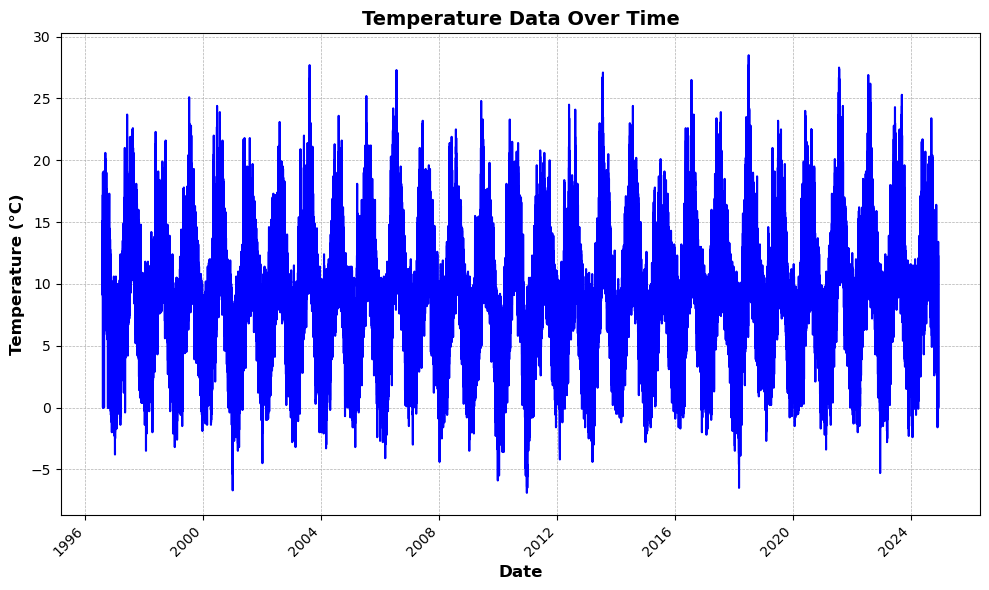

In [14]:

# Plot temperature data

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['date'], df['temp'], color='blue', label='Temperature')  # Line plot
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Temperature (°C)', fontsize=12, fontweight='bold')
ax.set_title('Temperature Data Over Time', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


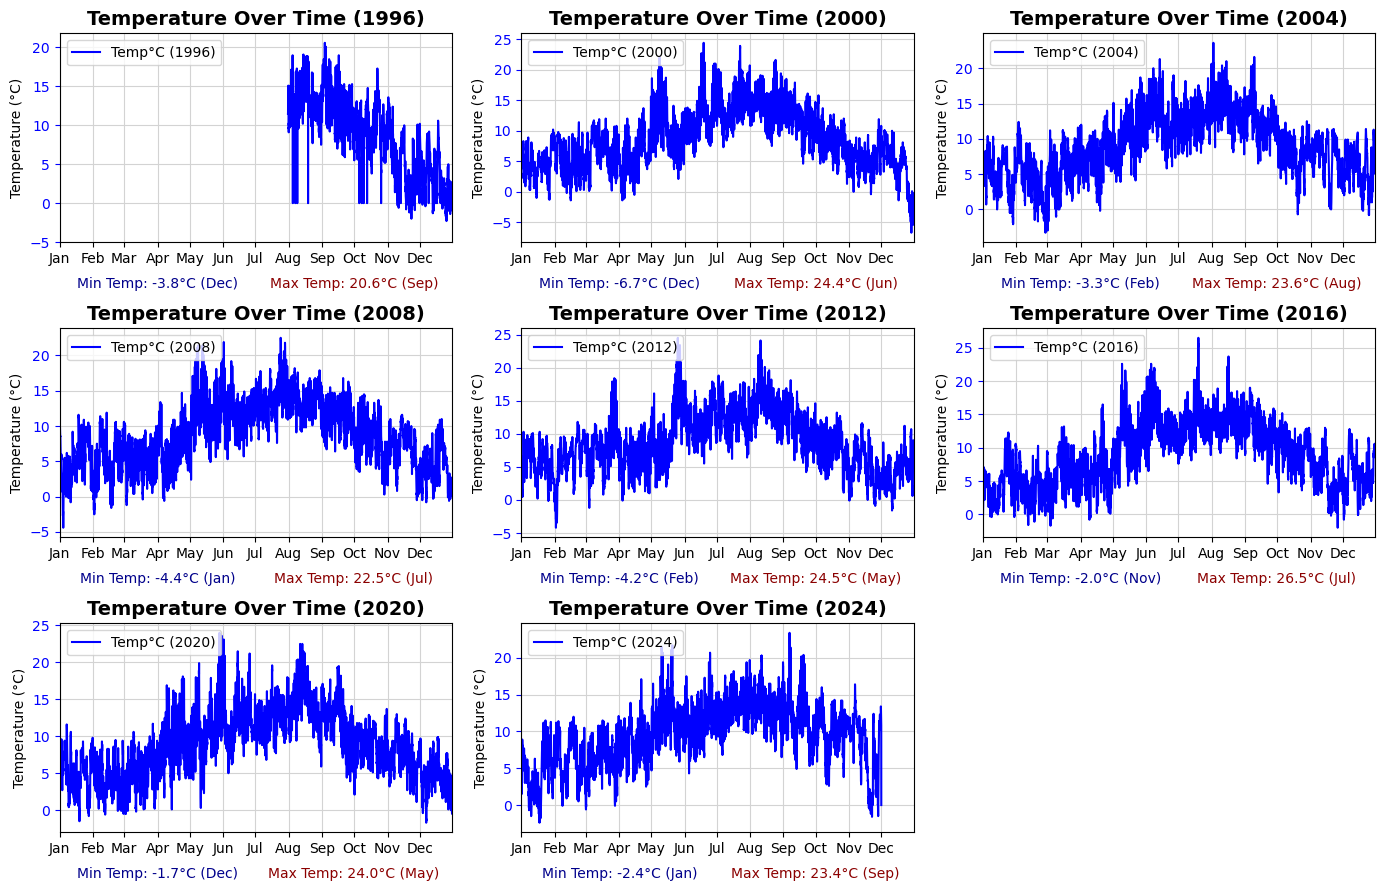

In [ ]:
# plot temp vs time for each year

years = [1996, 2000, 2004, 2008, 2012, 2016, 2020, 2024]

fig, axes = plt.subplots(3, 3, figsize=(14, 9))  # 3 rows, 3 columns

# Assign specific row + column positions for each year
plot_positions = [
    (0, 0),  # 1996
    (0, 1),  # 2000
    (0, 2),  # 2004
    (1, 0),  # 2008
    (1, 1),  # 2012
    (1, 2),  # 2016
    (2, 0),  # 2020
    (2, 1)   # 2024
]

# Loop through each year and plot the corresponding data to correct subplot
for year, (row, col) in zip(years, plot_positions): # for loop to iterate over each year and its corresponding position in the plot. zip function is used to iterate over two lists in parallel.
  
    df_year = df[df['date'].dt.year == year]                         # Filter the DataFrame for the current year
    
  
    min_temp = df_year['temp'].min()                            
    max_temp = df_year['temp'].max()
    
    min_temp_date = df_year[df_year['temp'] == min_temp]['date'].iloc[0] # Date of min temperature
    max_temp_date = df_year[df_year['temp'] == max_temp]['date'].iloc[0] # Date of max temperature
    
    min_month = min_temp_date.strftime('%b')  # Month of min temperature
    max_month = max_temp_date.strftime('%b')  # Month of max temperature
    
    # Plot the temperature data for the year with the legend entry
    axes[row, col].set_ylabel('Temperature (°C)')
    axes[row, col].set_ylabel('Temperature (°C)')
    axes[row, col].plot(df_year['date'], df_year['temp'], label=f'Temp°C ({year})', color='b')
    
    # Set the title, labels, and limits for the plot
    axes[row, col].set_title(f'Temperature Over Time ({year})', fontsize=14, fontweight='bold')
    axes[row, col].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Format x-axis as month names
    axes[row, col].set_ylabel('Temperature (°C)')
    axes[row, col].set_xlim(pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31'))
    
    # Add min and max temperature details side by side within the plot
    axes[row, col].text(0.25, -0.2, f'Min Temp: {min_temp:.1f}°C ({min_month})', ha='center', va='center', fontsize=10, color='darkblue', transform=axes[row, col].transAxes)
    axes[row, col].text(0.75, -0.2, f'Max Temp: {max_temp:.1f}°C ({max_month})', ha='center', va='center', fontsize=10, color='darkred', transform=axes[row, col].transAxes)

    # Change color of x-axis tick labels
    axes[row, col].tick_params(axis='x', colors='black')  
    axes[row, col].tick_params(axis='y', colors='blue')  

    # Change gridline color
    axes[row, col].grid(True, color='lightgrey') 

    # Add the legend to the plot (with the temperature label)
    axes[row, col].legend(fontsize=10, loc='upper left')

# Hide the last empty subplot (axes[2, 2])
axes[2, 2].axis('off')

plt.tight_layout() 
plt.show()


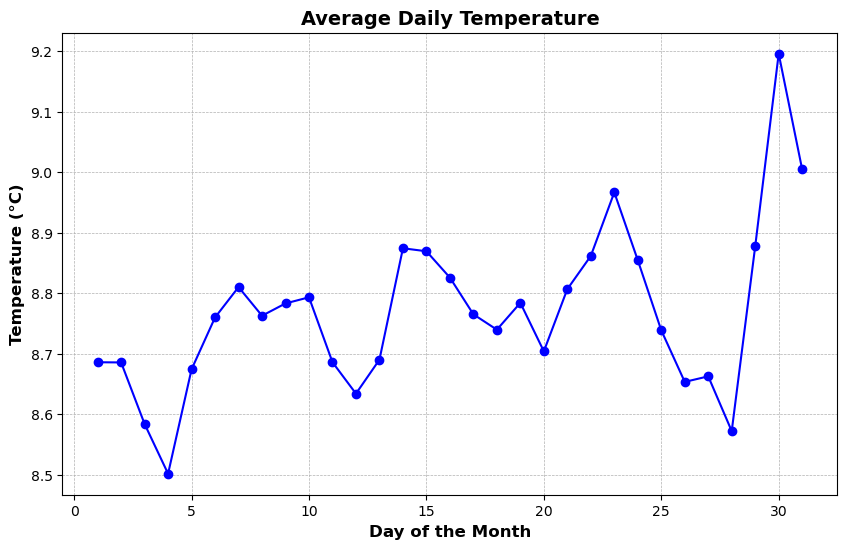

In [16]:

# Plot the daily mean temperature for each day of the month

daily_mean_temp=df.groupby(df['date'].dt.day)['temp'].mean()
#print(daily_mean_temp)

fig, ax = plt.subplots(figsize=(10, 6))
daily_mean_temp.plot(ax=ax, marker='o', color='blue')
ax.set_title('Average Daily Temperature', fontsize=14, fontweight='bold')
ax.set_xlabel('Day of the Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Temperature (°C)', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


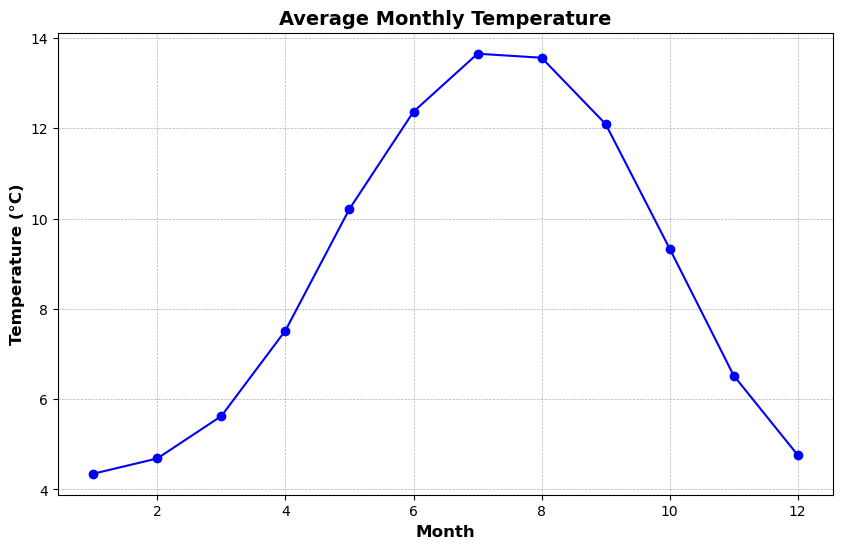

In [ ]:
# plot the mean monthly temperature

# Group by month and calculate the mean temperature
monthly_mean_temp = df.groupby(df['date'].dt.month)['temp'].mean()

# Plot the monthly mean temperature
monthly_mean_temp.plot(figsize=(10, 6), marker='o', color='blue')
plt.title('Average Monthly Temperature', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Temperature (°C)', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

#### References:

https://pandas.pydata.org/docs/user_guide/10min.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
https://www.geeksforgeeks.org/python-iterating-two-lists-at-once/
https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.plot.html
